In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
#Read the dataset
df = pd.read_csv(r'C:\Users\noemi\Documents\GitHub\Data-mining-project\datasets_final\final_dataset.csv')

In [3]:
df.head()

,region,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popular
0,3,0.685,0.644,10,-13.206,0,0.1550,0.302,0.000055,0.1140,0.808,164.919,169379,4,0
1,3,0.752,0.620,5,-5.536,1,0.0509,0.309,0.000000,0.0750,0.962,117.399,164459,4,0
2,1,0.748,0.627,7,-6.029,1,0.0639,0.131,0.000000,0.0852,0.524,120.963,188491,4,0
3,2,0.748,0.627,7,-6.029,1,0.0639,0.131,0.000000,0.0852,0.524,120.963,188491,4,0
4,3,0.748,0.627,7,-6.029,1,0.0639,0.131,0.000000,0.0852,0.524,120.963,188491,4,0


In [4]:
# Split into features and target
# 'popular' is the target column
X = df.drop('popular', axis=1)  # Features
y = df['popular']  # Target variable (1 for popular, 0 for not popular)


In [5]:
from sklearn.preprocessing import StandardScaler


In [6]:
#Scale the features
# Initialize StandardScaler to scale the features
scaler = StandardScaler()

# Fit the scaler on the features and transform them
X_scaled = scaler.fit_transform(X)


In [7]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
# Initialize SVM classifier with linear kernel
svm_clf = SVC(kernel='linear', random_state=42)



In [9]:
svm_clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [10]:
y_pred = svm_clf.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8520


In [16]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     55340
           1       0.00      0.00      0.00      9613

    accuracy                           0.85     64953
   macro avg       0.43      0.50      0.46     64953
weighted avg       0.73      0.85      0.78     64953



c:\Users\noemi\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\noemi\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\noemi\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


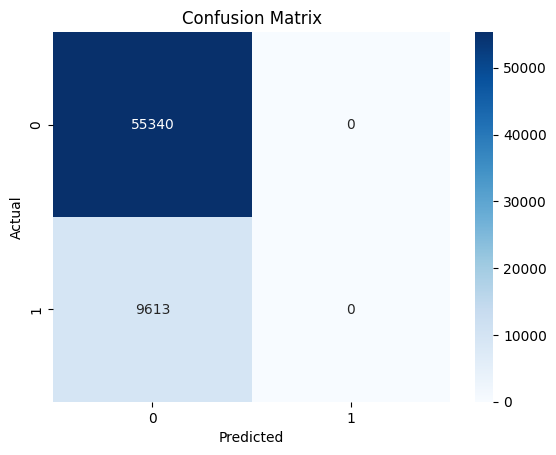

In [17]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the SVM model with a linear kernel
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_scaled, y)

# Get the coefficients (only available for linear kernels)
# The coefficients correspond to the importance of each feature
coefficients = svm_clf.coef_[0]  # coef_ contains the feature weights, take the first (and only) row

# Create a DataFrame to store feature names and their corresponding coefficients (importance)
feature_importances = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Coefficient': abs(coefficients)  # Absolute value of the coefficient to measure importance
})

# Sort the features by importance (magnitude of the coefficient)
feature_importances = feature_importances.sort_values(by='Coefficient', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importances)
plt.title('SVM Feature Importance (Linear Kernel)')
plt.show()